# Assignment 5:
### รหัสนักศึกษา: 9550447
### ชื่อ-นามสกุล: นฤมล  เพ็ญพานิชย์
### หลักสูตร: SED

## Imbalanced Data Classification & Model Deployment

- Understand the challenges of imbalanced classification.
- Train different models with various resampling techniques.
- Compare model performance using ROC and PR curves.
- Deploy the best-performing model using Streamlit.


In [13]:
pip install imbalanced-learn scikit-learn matplotlib seaborn streamlit


Note: you may need to restart the kernel to use updated packages.


## **2. Load and Explore the Dataset**  
Select a dataset from [`imbalanced-learn datasets`](https://imbalanced-learn.org/stable/datasets/index.html). Example: `fetch_datasets` provides multiple datasets.

In [21]:
from imblearn.datasets import fetch_datasets
import pandas as pd

# Load an imbalanced dataset (modify as needed)
dataset = fetch_datasets()['wine_quality']  # Example: 'wine_quality'
X, y = dataset.data, dataset.target

# Convert to DataFrame
df = pd.DataFrame(X, columns=[f"Feature_{i}" for i in range(X.shape[1])])
df['Target'] = y

# Check class distribution
print(df['Target'].value_counts())

Target
-1    4715
 1     183
Name: count, dtype: int64


In [49]:
df

,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Target
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,-1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,-1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,-1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,-1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,-1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,-1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,-1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,-1


## **3. Train-Test Split**  

In [23]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [51]:
X_train.shape

(3428, 11)

In [53]:
X_test.shape

(1470, 11)

In [55]:
y_train.shape

(3428,)

In [57]:
y_test.shape

(1470,)

## **4. Train Models**  

### **4.1 Baseline Model (Logistic Regression)**

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Train a baseline model (Logistic Regression)
base_model = LogisticRegression(random_state=42, max_iter=1000)
base_model.fit(X_train, y_train)

# Predictions
y_pred = base_model.predict(X_test)
print("Baseline Model (Logistic Regression) Classification Report:")
print(classification_report(y_test, y_pred))

Baseline Model (Logistic Regression) Classification Report:
              precision    recall  f1-score   support

          -1       0.96      1.00      0.98      1415
           1       0.50      0.02      0.04        55

    accuracy                           0.96      1470
   macro avg       0.73      0.51      0.51      1470
weighted avg       0.95      0.96      0.95      1470



### **4.2 Model with Undersampling (Logistic Regression)**  

In [27]:
from imblearn.under_sampling import RandomUnderSampler

# Apply undersampling
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# Train Logistic Regression model
under_model_lr = LogisticRegression(random_state=42, max_iter=1000)
under_model_lr.fit(X_train_rus, y_train_rus)

# Predictions
y_pred_under = under_model_lr.predict(X_test)
print("Undersampling Model (Logistic Regression) Classification Report:")
print(classification_report(y_test, y_pred_under))

Undersampling Model (Logistic Regression) Classification Report:
              precision    recall  f1-score   support

          -1       0.98      0.73      0.84      1415
           1       0.08      0.60      0.14        55

    accuracy                           0.73      1470
   macro avg       0.53      0.67      0.49      1470
weighted avg       0.95      0.73      0.81      1470



In [63]:
X_train.shape

(3428, 11)

In [61]:
X_train_rus.shape

(256,)

In [67]:
y_train.shape

(3428,)

In [69]:
y_train_rus.shape

(256,)

In [81]:
sum(y_train_rus==-1)

128

### **4.3 Model with Oversampling (Logistic Regression)**  

In [29]:
from imblearn.over_sampling import RandomOverSampler ##change SMODE

# Apply oversampling
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

# Train Logistic Regression model
over_model_lr = LogisticRegression(random_state=42, max_iter=1000)
over_model_lr.fit(X_train_ros, y_train_ros)

# Predictions
y_pred_over = over_model_lr.predict(X_test)
print("Oversampling Model (Logistic Regression) Classification Report:")
print(classification_report(y_test, y_pred_over))

Oversampling Model (Logistic Regression) Classification Report:
              precision    recall  f1-score   support

          -1       0.99      0.76      0.86      1415
           1       0.10      0.71      0.18        55

    accuracy                           0.76      1470
   macro avg       0.54      0.74      0.52      1470
weighted avg       0.95      0.76      0.83      1470



C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [71]:
X_train.shape

(3428, 11)

In [73]:
X_train_ros.shape

(6600, 11)

In [75]:
y_train.shape

(3428,)

In [77]:
y_train_ros.shape

(6600,)

In [87]:
sum(y_train_ros==1)

3300

In [89]:
from imblearn.over_sampling import SMOTE ##change SMOTE

# Apply oversampling
ros = SMOTE(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

# Train Logistic Regression model
over_model_lr = LogisticRegression(random_state=42, max_iter=1000)
over_model_lr.fit(X_train_ros, y_train_ros)

# Predictions
y_pred_over = over_model_lr.predict(X_test)
print("Oversampling Model (Logistic Regression) Classification Report:")
print(classification_report(y_test, y_pred_over))

Oversampling Model (Logistic Regression) Classification Report:
              precision    recall  f1-score   support

          -1       0.99      0.77      0.86      1415
           1       0.11      0.71      0.18        55

    accuracy                           0.77      1470
   macro avg       0.55      0.74      0.52      1470
weighted avg       0.95      0.77      0.84      1470



### **4.4 Random Forest Model (No Resampling)**  

In [31]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Model Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Model Classification Report:
              precision    recall  f1-score   support

          -1       0.97      1.00      0.98      1415
           1       0.85      0.20      0.32        55

    accuracy                           0.97      1470
   macro avg       0.91      0.60      0.65      1470
weighted avg       0.97      0.97      0.96      1470



In [91]:
### RF+SMOTE
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_ros, y_train_ros)

# Predictions
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Model Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Model Classification Report:
              precision    recall  f1-score   support

          -1       0.98      0.97      0.98      1415
           1       0.38      0.42      0.40        55

    accuracy                           0.95      1470
   macro avg       0.68      0.70      0.69      1470
weighted avg       0.96      0.95      0.95      1470



## **5. Compare Model Performance**  

### **5.1 Plot ROC Curve & ROC-AUC Score**

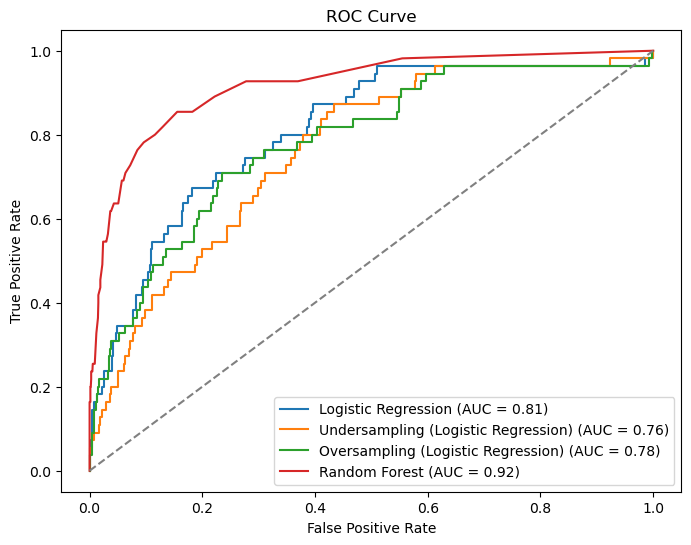

In [33]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

models = {
    "Logistic Regression": base_model,
    "Undersampling (Logistic Regression)": under_model_lr,
    "Oversampling (Logistic Regression)": over_model_lr,
    "Random Forest": rf_model
}

plt.figure(figsize=(8, 6))

for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=1)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [97]:
y_prob

array([0.  , 0.03, 0.02, ..., 0.01, 0.02, 0.03])

In [99]:
fpr, tpr

(array([0.        , 0.        , 0.        , 0.00141343, 0.00141343,
        0.00212014, 0.00282686, 0.00282686, 0.004947  , 0.00565371,
        0.00777385, 0.00918728, 0.00989399, 0.01130742, 0.01201413,
        0.01484099, 0.0155477 , 0.0155477 , 0.01908127, 0.01908127,
        0.02261484, 0.02402827, 0.02756184, 0.02897527, 0.02968198,
        0.03250883, 0.03392226, 0.03674912, 0.03816254, 0.04310954,
        0.05088339, 0.05724382, 0.06007067, 0.06360424, 0.07208481,
        0.08480565, 0.09611307, 0.11590106, 0.12932862, 0.15547703,
        0.18233216, 0.22190813, 0.27773852, 0.36961131, 0.55477032,
        1.        ]),
 array([0.        , 0.01818182, 0.16363636, 0.16363636, 0.2       ,
        0.2       , 0.21818182, 0.23636364, 0.23636364, 0.25454545,
        0.25454545, 0.25454545, 0.27272727, 0.30909091, 0.32727273,
        0.36363636, 0.4       , 0.41818182, 0.43636364, 0.45454545,
        0.49090909, 0.54545455, 0.54545455, 0.54545455, 0.54545455,
        0.56363636, 0.5818

### **5.2 Plot PR Curve & PR-AUC Score**  

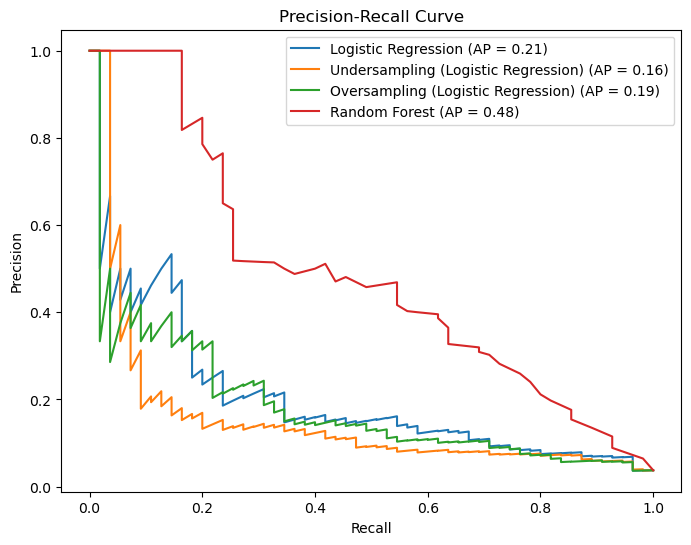

In [35]:
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure(figsize=(8, 6))

for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_prob, pos_label=1)
    pr_auc = average_precision_score(y_test, y_prob)
    plt.plot(recall, precision, label=f'{name} (AP = {pr_auc:.2f})')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

In [95]:
y_prob

array([0.  , 0.03, 0.02, ..., 0.01, 0.02, 0.03])

## **6. Select the Best Model for Deployment**  
Choose the best model based on **ROC-AUC and PR-AUC scores**. Assume **oversampling model** performed best.

### **6.1 Save the Model**  

In [104]:
import joblib

# Save the best model
joblib.dump(rf_model, "best_model.pkl")

['best_model.pkl']

## **7. Deploy Model using Streamlit**  



In [116]:
%%writefile app.py
import streamlit as st
import joblib
import numpy as np

# Load model
model = joblib.load("best_model.pkl")

# Streamlit UI
st.title("My first ML App (Study on Imbalanced Data Classification by 67130701706 ")

# Input fields
features = []
for i in range(11):  # Adjust based on dataset
    value = st.number_input(f"Feature_{i}", value=0.0)
    features.append(value)

# Prediction
if st.button("Predict"):
    prediction = model.predict([np.array(features)])
    st.write(f"Predicted Class: {prediction[0]}")


Overwriting app.py


In [120]:
%%writefile requirements.txt 
streamlit
joblib
numpy
scikit-learn
imbalanced-learn
matplotlib

Writing requirements.txt


**Insert link of your App here.**